<a href="https://colab.research.google.com/github/cherylktt/tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


### Creating data to view and fit

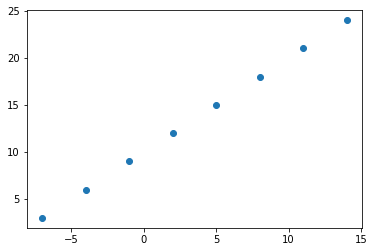

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) # independent variable

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) # dependent variable

# Visualise it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

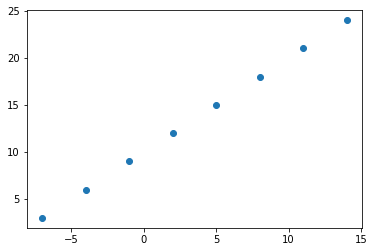

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model. 
2. **Compiling a model** - define the loss function (the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # take 1 number to predict 1 number
])

# Alternatively,
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


> Loss - how wrong your model's predictions are compared to the truth labels (you want to minimise this)

> Optimizer - how your model should update its internal patterns to better its predictions

> Metrics - human interpretable values for how well your model is doing

> Epochs - how many times the model will go through all of the training examples

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model. 

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the opimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 710ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Make another prediction of y
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model again

# 1. Create the model (this time with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time with a different optimizer)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # learning rate is the most important hyperparameter
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 7.46

In [ ]:
# Make another prediction of y
model.predict([17.0])

array([[26.583803]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll got through when building a nerual network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation, we should visualise:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up with the ground truth?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

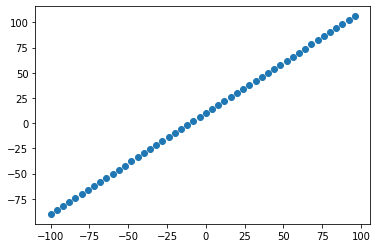

In [ ]:
# Visualise the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets, let's visualise it.

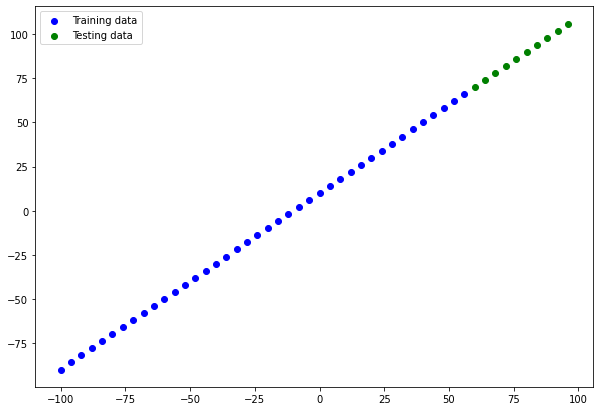

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a nerual network for our data

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualising the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # passing 1 number to predict 1 number
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Traininable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during trianing (this is typical when you bring in already learnt patterns or parameters from other models during transfer learning).

For a more in-depth overview of the trianinable parameters within a layer, check out MIT's introduction to deep learning video.



In [ ]:
# Let's fit out model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # verbose=0 -> no output

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


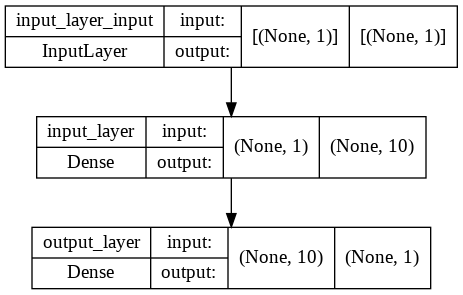

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualising our model's predictions

To visualise predictions, it's a good idae to plot them against the ground truth labels. Often you'll see this in the form of `y_test` or `y_true` versus `y_pred`.

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot's trianing data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue and testing data in green
  plt.scatter(train_data, train_labels, c="b", label="training data")
  plt.scatter(test_data, test_labels, c="g", label="testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  # Show the legend
  plt.legend();

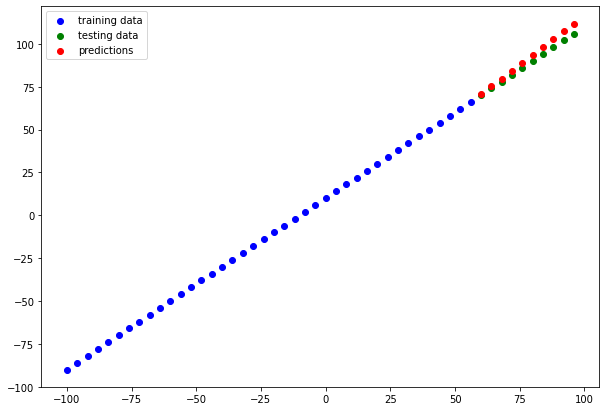

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, or on average, how wrong is each of my model's predictions (`tf.keras.losses.mae()`)
* MSE - mean square error, or square the average errors, for when large errors are more significant than smaller errors (`tf.keras.losses.mse()`)
* Huber - combination of MSE and MAE, less sensitive to outliers than MSE (`tf.keras.losses.Huber()`)

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 260ms/step - loss: 3.1970 - mae: 3.1970


[3.1969642639160156, 3.1969642639160156]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                      y_pred = tf.squeeze(y_pred))
mae.numpy()

3.1969643

In [ ]:
# Calcaulte the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                   y_pred = tf.squeeze(y_pred))
mse.numpy()

13.0703

In [ ]:
# Create a function for MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

## Running experiments to improve our model

1. Get more data - more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

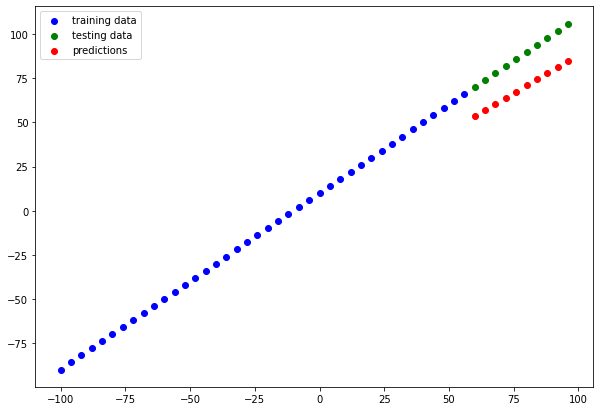

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(18.745327, 353.5734)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

(None, 3.1969643, 13.0703)

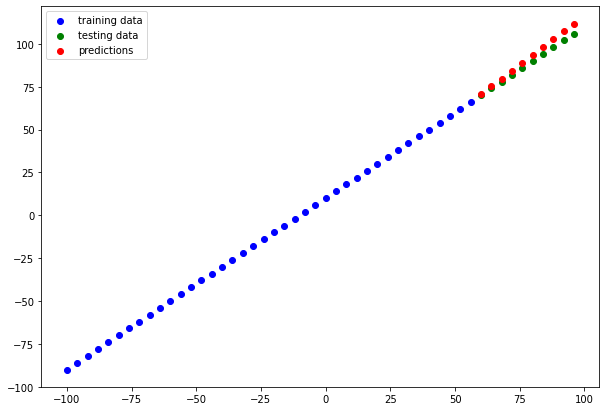

In [ ]:
y_preds_2 = model_2.predict(X_test)
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
plot_predictions(predictions=y_preds_2), mae_2, mse_2



**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

(None, 68.71362, 4808.0283)

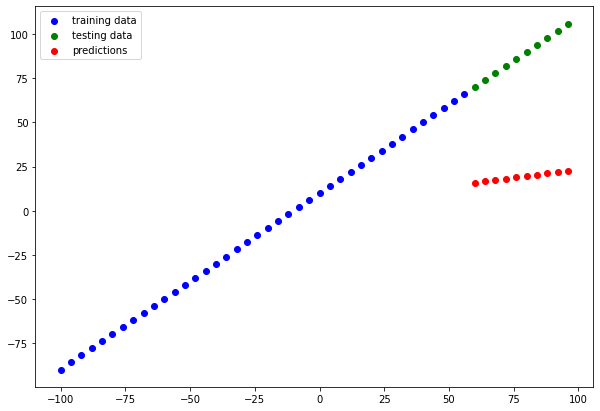

In [ ]:
y_preds_3 = model_3.predict(X_test)
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
plot_predictions(predictions=y_preds_3), mae_3, mse_3

`model_3` has been overfitted.

**Note:** You want to start with small experiments (small models) at first, and make sure they work before increasing the scale when neccessary.

### Comparing the results of our experiments

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1], 
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196964,13.070300
2,model_3,68.713623,4808.028320


Looks like `model_2` performed the best.

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Takes a lot of trial and error.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments. And when doing so, it can be tedious if you're running lots of experiments. Luckily, there are tools to help us.

As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they are trained) such as in a web application or a mobile app.

There are 2 main formats we can save our model's into:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

True

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 best_model_HDF5_format.h5		 tensorflow
'Colab Notebooks'			'uh idk'
'Copy of GovTech 2022 Internship.xlsx'	'uni applications.gdoc'
'Resume - Cheryl Kwek.pdf'		'Zhonghua Primary School'
 stuff


## A larger example

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build neural netowrk (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

Right now it looks like our model isn't performing too well, so let's try to improve it.

To try and imporve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units + change the optimizer
2. Train for longer

In [ ]:
# Build neural netowrk (sort of like model_2 above)
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the new model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [ ]:
# insurance_model_3
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history=insurance_model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.5325 - mae: 3494.5325


[3494.532470703125, 3494.532470703125]

Text(0.5, 0, 'epochs')

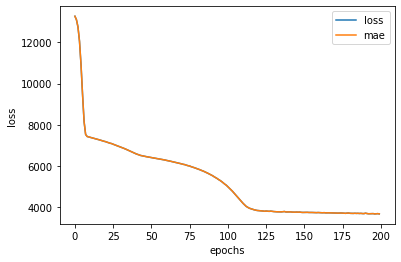

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

[EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) is a TensorFlow component you can add to your model to stop training once it stop improving a certain metric.

## Preprocessing data (normalisation and standardisation)

In terms of scaling values, neural networks tend to prefer normalisation. If you're not sure on which to use, you can try both and see which one performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all these values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalisation (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
# Check the shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Let's build a neural network on the new data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build insurance_model_4
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100, verbose=0)

# Evaluate insurance_model_4
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

# Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200,
                       n_features=10,
                       n_targets=1)
X.shape, y.shape

((200, 10), (200,))

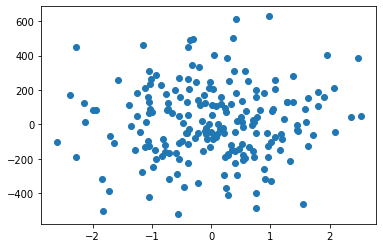

In [ ]:
plt.scatter(X[:,0],y)

In [ ]:
# Create model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10, verbose=0)

# Evaluate the model
model.evaluate(X, y)

7/7 [==============================] - 0s 4ms/step - loss: 170.5905 - mae: 170.5905


[170.5904541015625, 170.5904541015625]

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [ ]:
# Create model_1 with 4 Dense layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=10, verbose=0)

# Evaluate model_1
model_1.evaluate(X, y)

7/7 [==============================] - 0s 6ms/step - loss: 170.5905 - mae: 170.5904


[170.5904541015625, 170.59043884277344]

> Increasing the number of dense layers does not improve the model, so let's split into train and test set instead.

In [ ]:
# Splitting the data into train and test splits 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.16)

# Checking the shapes of our splitted data 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((168, 10), (168,), (32, 10), (32,))

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(168, 168, 32, 32)

In [ ]:
# Create model_2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 8ms/step - loss: 169.1350 - mae: 169.1350
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 169.1228 - mae: 169.1228
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 169.1108 - mae: 169.1108
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 169.0994 - mae: 169.0994
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 169.0882 - mae: 169.0882
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 169.0770 - mae: 169.0770
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 169.0659 - mae: 169.0659
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 169.0548 - mae: 169.0548
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 169.0440 - mae: 169.0440
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 169.0330 - mae: 169.0330
Epoch 11/100
6/6 [=====================

In [ ]:
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 196ms/step - loss: 178.4868 - mae: 178.4868


[178.48678588867188, 178.48678588867188]

In [ ]:
# Get predictions from model_2
y_preds_2 = model_2.predict(X_test)

In [ ]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="train_data")
  plt.scatter(test_data, test_labels, c="g", label="test_data")
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

In [ ]:
X_test.shape, y_test.shape, y_preds_2.shape

((32, 10), (32,), (32, 10, 1))

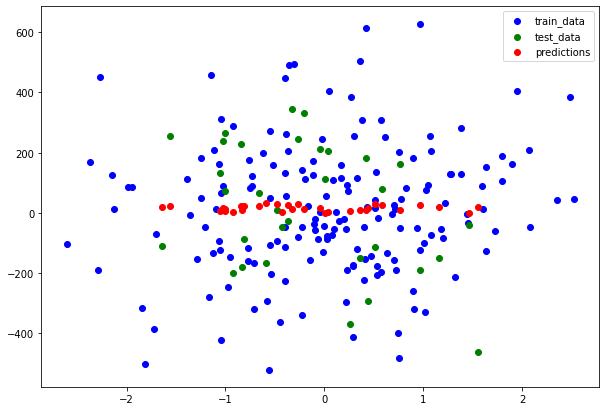

In [ ]:
y_preds_2=np.arange(0,len(y_preds_2),1) ## found from stack overflow

plot_predictions(X_train[:,0], y_train,
                 X_test[:,0], y_test, y_preds_2)

Let's try to improve on our model.

In [ ]:
# Build model_3 with 2 layers and more units
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(X_train, y_train, epochs=100)

# Evaluate model_3
model_3.evaluate(X_test, y_test)

Epoch 1/100
6/6 [==============================] - 1s 15ms/step - loss: 168.8445 - mae: 168.8445
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 168.8229 - mae: 168.8229
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 168.8019 - mae: 168.8019
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 168.7812 - mae: 168.7812
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 168.7605 - mae: 168.7605
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 168.7389 - mae: 168.7389
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 168.7176 - mae: 168.7176
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 168.6937 - mae: 168.6937
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 168.6709 - mae: 168.6709
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 168.6461 - mae: 168.6461
Epoch 11/100
6/6 [====================

[163.8226776123047, 163.8226776123047]

In [ ]:
# Build model_4 with 3 layers and more hidden units
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_4.fit(X_train, y_train, epochs=100)

# Evaluate model_4
model_4.evaluate(X_test, y_test)

Epoch 1/100
6/6 [==============================] - 1s 6ms/step - loss: 168.5081 - mae: 168.5081
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 167.8484 - mae: 167.8484
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 167.1440 - mae: 167.1440
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 166.3627 - mae: 166.3627
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 165.4547 - mae: 165.4547
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 164.3713 - mae: 164.3713
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 163.0548 - mae: 163.0548
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 161.3938 - mae: 161.3938
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 159.4266 - mae: 159.4266
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 156.9666 - mae: 156.9666
Epoch 11/100
6/6 [=====================

[0.35653921961784363, 0.35653921961784363]

In [ ]:
y_preds_4 = model_4.predict(X_test)

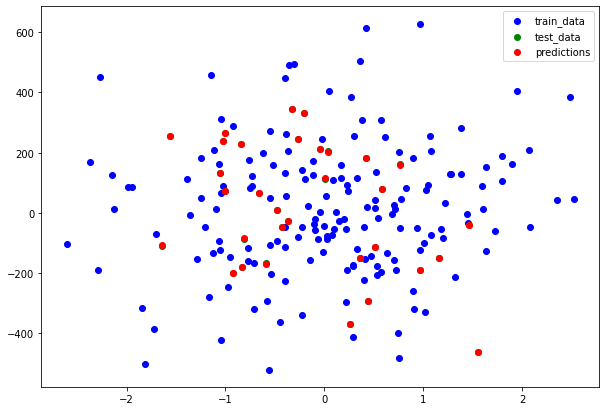

In [ ]:
plot_predictions(X_train[:,0], y_train,
                 X_test[:,0], y_test, y_preds_4)


A single green dot can't be spotted, which means our model has predicted every test data correctly.

3. Try and improve the results we got on the insurance dataset, some thing you might want to include:

* Building a larger model (how does one with 4 dense layers go?)
* Increasing the number of units in each layer
* Lookup the documentation of Adam and find out what the first parameters is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all these values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalisation (MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# insurance_model_4.evaluate(X_test_normal, y_test) -> loss:3438.7844, mae:3438.7844

Build `insurance_model_5` using `insurance_model_4` but with 4 Dense layers

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build insurance_model_5
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model_5.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=200, verbose=0)

# Evaluate insurance_model_5
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3168.8918 - mae: 3168.8918


[3168.891845703125, 3168.891845703125]

> Increasing the number of dense layers improved the model.

Build `insurance_model_6` using `insurance_model_5` but with more hidden units in each layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build insurance_model_6
insurance_model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])
insurance_model_6.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model_6.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=200, verbose=0)

# Evaluate insurance_model_6
insurance_model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 9ms/step - loss: 3169.7219 - mae: 3169.7219


[3169.721923828125, 3169.721923828125]

> Increasing the number of hidden units in each layer did not improve the model.

Build `insurance_model_7` using `insurance_model_5` but with 10x learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build insurance_model_7
insurance_model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
insurance_model_7.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
insurance_model_7.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=200, verbose=0)

# Evaluate insurance_model_7
insurance_model_7.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3159.3831 - mae: 3159.3831


[3159.383056640625, 3159.383056640625]

> Increasing the learning rate 10x improved the model, but increasing it 100x did not.

Build `insurance_model_8` using `insurance_model_7` but with 300 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build insurance_model_8
insurance_model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])
insurance_model_8.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
history=insurance_model_8.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=300, verbose=0)

# Evaluate insurance_model_8
insurance_model_8.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3162.6467 - mae: 3162.6467


[3162.646728515625, 3162.646728515625]

> Increasing the epochs to 300 did not improve the model when using `insurance_model_7`, but it is better when `insurance_model_6` is used instead.

Text(0.5, 0, 'epochs')

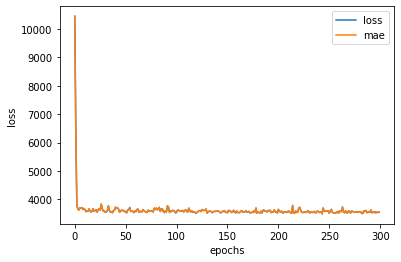

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

4. Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the Boston pricing dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
# Build a model
tf.random.set_seed(42)

boston_housing = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
boston_housing.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])
history=boston_housing.fit(X_train, y_train, epochs=200, verbose=0)

# Evaluate the model
boston_housing.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.4548 - mae: 3.4548


[3.454767942428589, 3.454767942428589]

Text(0.5, 0, 'epochs')

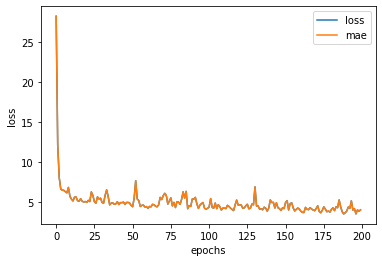

In [ ]:
# Plot loss VS epoch
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')